In [1]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [34]:
view = np.array([[-2, 1], [-1.5, 1.5]])

def function(z, c):
	return z**2 + c

cc = 0
pts = 200_000
its = 5_000
z0 = -0.7+0.5j

In [35]:
z1 = np.random.rand(pts, 2) * (view[:,1] - view[:,0]) + view[:, 0]
z1 = z1[:,0]+ 1j*z1[:,1]

In [36]:
l=[]
cc = 0

z = np.copy(z1)
c = np.copy(z)

#x = np.logical_not((np.abs(c)**2) * (8 * np.abs(c)**2 - 3) <= 3/32 - c.real)
#c = c[x]
print(c.shape)

z = np.zeros_like(c)
z = np.full_like(c, z0)
n = 0
l1 = []

ind = np.arange(z.shape[0])

for i in tqdm(range(its)):
    z = function(z, c)
    n += 1
    l1.append([z.copy(), ind.copy(), n])

    x = np.abs(z) < 2
    c = c[x]
    z = z[x]
    ind = ind[x]

(200000,)
100%|██████████| 5000/5000 [00:02<00:00, 1994.82it/s]


In [37]:
print(len(l1), ind.shape)
l = []
ll = []
for a in tqdm(l1):
    x = np.logical_not(np.isin(a[1], ind))
    b = a[0][x]
    #l2 = np.stack((a[0][x].real, a[0][x].imag, np.full(a[0][x].shape, a[2]))).T
    #l.extend(l2.tolist())
    l2 = [[b[i].real, b[i].imag, a[2]] for i in range(b.shape[0])]
    l.extend(l2)

ll = [[e[0] for e in l], [e[1] for e in l], [e[2] for e in l]]
print(len(l))

5000(16029,)
100%|██████████| 5000/5000 [00:04<00:00, 1245.91it/s]
672774


In [38]:
print(l[0])

[-0.19458213878394642, -2.1107081378753643, 1]


In [39]:
res = 1080
H = np.histogram2d(ll[0], ll[1], bins=res, range=view)
density = H[0]
H2 = np.histogram2d(ll[0], ll[1], bins=res, range=view, weights=ll[2])
density2 = H2[0]

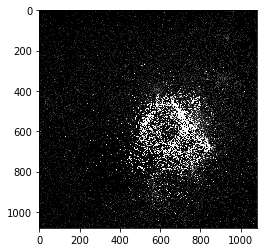

In [41]:
#final = np.mod(density2, 20)/density
final = density2.copy()/20_0
#final = density.copy()/20
final = np.sqrt(final)
#final = np.log(1+final)

vmax = 1
plt.imshow(final, cmap='Greys_r', vmin=0, vmax=vmax)
plt.show()

In [42]:
plt.imsave('img/t14.png',final, cmap='Greys_r', vmin=0, vmax=vmax)